In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Introduction to Neural Networks & Deep Learning Project/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df['Geography'].unique(), df['Gender'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [7]:
# Changing the type of the column.
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [8]:
# Dropping the columns as we don't need these for this dataset.
df.drop(df[['RowNumber', 'CustomerId', 'Surname']], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [10]:
df.shape

(10000, 11)

## Encoding the Dataset

In [11]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [12]:
df = pd.get_dummies(df)

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [14]:
# Finding the Nan value
df.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

The dataset has no null values.

## Statistics & Plots

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


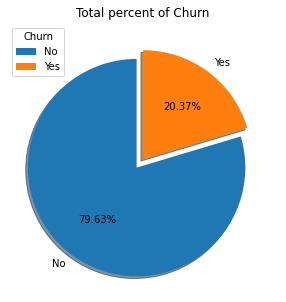

In [16]:
plt.figure(figsize = (10,5))
plt.pie(df['Exited'].value_counts(sort = True), explode = [0.1, 0], labels = ['No','Yes'], autopct ='%.2f%%', shadow = True, startangle = 90)
plt.title('Total percent of Churn')
plt.legend(title = 'Churn')
plt.show()

Above chart showing the churning rate. From the chart, around 79% of customers stayed at the same bank, and the rest are left.

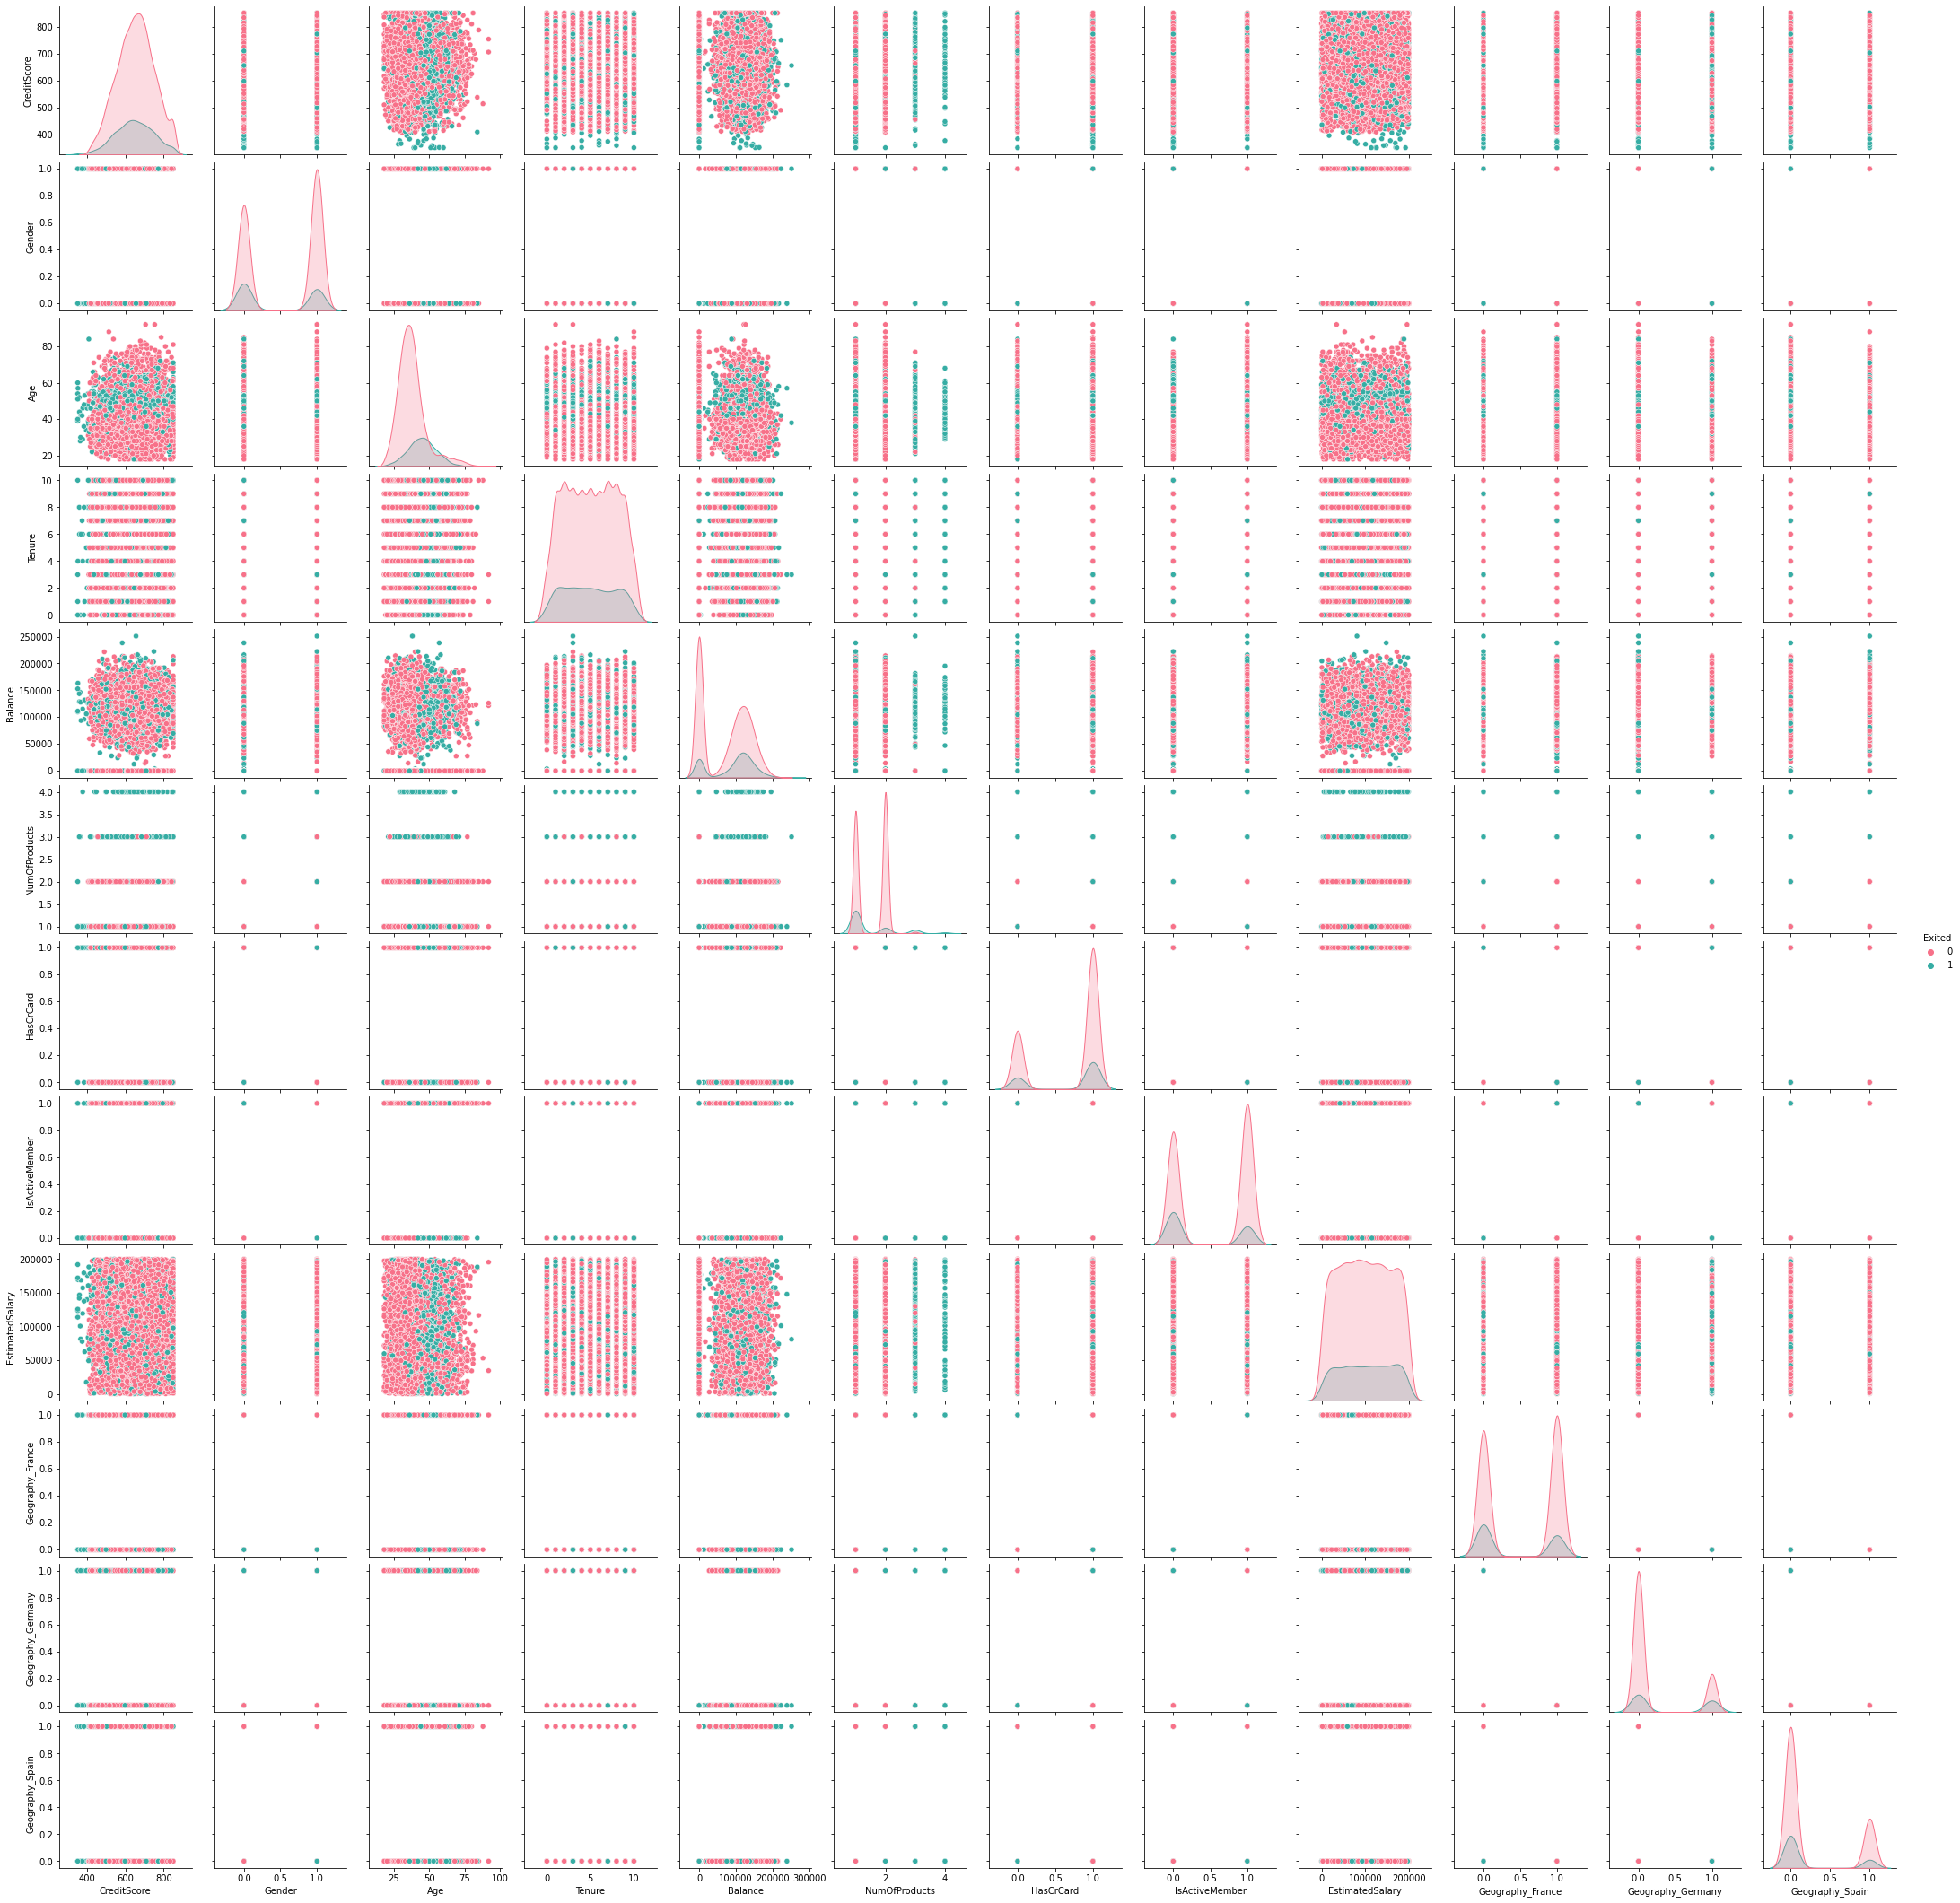

In [17]:
sns.pairplot(df, hue = 'Exited', palette = 'husl')

Since the data are in the cloud and vertical/horizontal form, there is no positive or negative relationship with each other.

### Feature and Target

In [18]:
# Our target column is 'Exited', that is showing the churn of the bank.
X = df.drop(['Exited'], axis = 1)
y = df['Exited']

## Training, Testing and Normalizing the data

In [19]:
# Split the dataset into 70/30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 12), (3000, 12), (7000,), (3000,))

In [20]:
# Scaling the feature columns.
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

## Deep Neural Model

In [21]:
model=Sequential()
model.add(Flatten(input_shape = (12,)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [22]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'BinaryCrossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In this model, I used 3 hidden layers, therefore our neural model is made of 5 layers.

In [23]:
model.fit(sc_X_train, y_train, batch_size = 32, validation_split = 0.1, epochs = 50)

Epoch 1/50
197/197 [==============================] - 1s 3ms/step - loss: 0.6732 - accuracy: 0.5702 - val_loss: 0.4776 - val_accuracy: 0.7986
Epoch 2/50
197/197 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7959 - val_loss: 0.4327 - val_accuracy: 0.8200
Epoch 3/50
197/197 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8174 - val_loss: 0.4165 - val_accuracy: 0.8329
Epoch 4/50
197/197 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8292 - val_loss: 0.4068 - val_accuracy: 0.8329
Epoch 5/50
197/197 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8292 - val_loss: 0.3983 - val_accuracy: 0.8371
Epoch 6/50
197/197 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8315 - val_loss: 0.3892 - val_accuracy: 0.8386
Epoch 7/50
197/197 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8333 - val_loss: 0.3840 - val_accuracy: 0.8429
Epoch 

### Prediction

In [24]:
y_pred = model.predict(sc_X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

## Accuracy and Confusion Matrix

In [25]:
print("Accuracy Score: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

Accuracy Score: 85.57%


In [26]:
confusion_matrix(y_test, y_pred)

array([[2289,  100],
       [ 333,  278]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2389
           1       0.74      0.45      0.56       611

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.84      0.86      0.84      3000



## Conclusion

The deep neural model has predicted a satisfying good result, but not the better one. We got the accuracy score above 80%, but the model can't go above 90 or 95%. In the classification report, the F1 score for 0 [Churn - No] has a good score, but 1 [Churn - Yes] has a poor score. For improvement, we may have to use a furthermore complex model with proper hyper tuning to achieve an excellent result.